In this problem set we implement standard linear regression on a one-dimensional dataset collected from a simulated motorcycle accident.  We will investigate the behavior of linear regression on various sets of basis functions.

<b>1.a)</b> Fit a linear regression model using up to order $L=5$ monomials.  Plot the test data points and predictions for this model. 

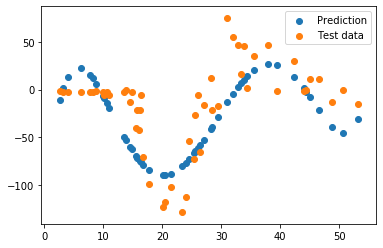

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
data = loadmat('motor.mat')
import hw4
import imp
imp.reload(hw4)
motorReg = hw4.linReg()
motorReg.loadData(data, list(data.keys())[3:7])
motorReg.polyLinReg(5)  #Fit using polynomial basis features up to order 5
motorReg.fit()
y5 = motorReg.predict(motorReg.xTest)
y5g = motorReg.predict(motorReg.xGrid)
motorReg.plot()

<b>1.b)</b> Fit models with polynomial features up to order $L=19$.  Plot the MSE on the training and test data on the same set of axes as a function of $L$.  Which model has the smallest training error and which has the smallest test error?  Plot the predictions of these models for the test data on the same axes as those from (a).

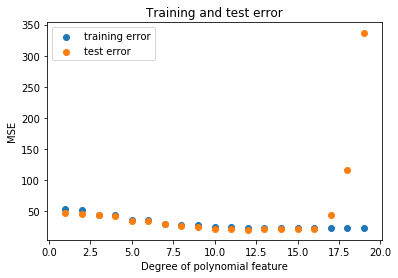

The model with the smallest training error has degree 19 polynomials while the model with the smallest test error has polynomials of degree 12


In [44]:
lTrain, lTest, *_ = motorReg.validate(19, basis = 'poly', plot = True)
print('The model with the smallest training error has degree', lTrain, 'polynomials while the model with the smallest test error has polynomials of degree', lTest)

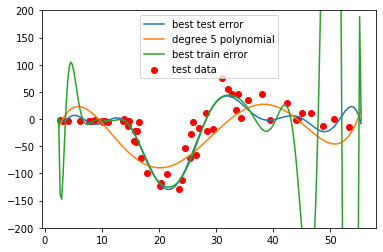

In [45]:
motorReg.polyLinReg(lTest) #Fit model that had best MSE on training data.
motorReg.fit()
testPredict = motorReg.predict(motorReg.xGrid)

motorReg.polyLinReg(lTrain)
motorReg.fit()
trainPredict = motorReg.predict(motorReg.xGrid)
#Plot all classifiers on same axes.
plt.plot(motorReg.featGrid, testPredict, label='best test error')
plt.plot(motorReg.featGrid, y5g, label='degree 5 polynomial')
plt.plot(motorReg.featGrid, trainPredict, label='best train error')
plt.scatter(motorReg.featTest, motorReg.yTest, label='test data', color='red')
plt.legend()
plt.ylim(-200,200)
plt.show() 

<b>1c)</b> Instead of using monomial features, we use radial basis functions of the form:
$$
\phi_j (x) = \exp \left[ - \frac{ (x - \mu_j )^2}{2 \sigma^2} \right]
$$
where $\mu_j$ are $L$ equally spaced points between $-1$ and $1$, and $\sigma^2 = ( \mu_2 - \mu_1)^2$ the spacing between consecutive centers.  Repeat parts (a)-(b) for $L=2, \dots, 25$.

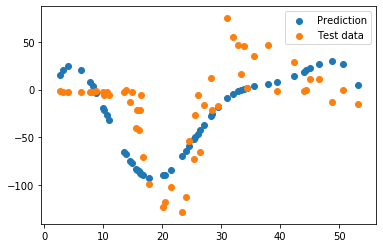

5 radial basis functions


In [46]:
motorReg.radialLinReg(5)
motorReg.fit()
y5 = motorReg.predict(motorReg.xTest)
y5g = motorReg.predict(motorReg.xGrid)
motorReg.plot()
print('5 radial basis functions')

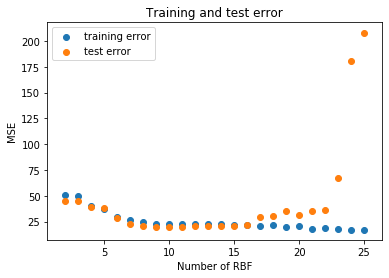

The model with the smallest training error has degree 24 polynomials while the model with the smallest test error has polynomials of degree 9


In [47]:
lTrain, lTest, *_ = motorReg.validate(25, basis='radial', plot=True)
print('The model with the smallest training error has degree', lTrain, 'polynomials while the model with the smallest test error has polynomials of degree', lTest)

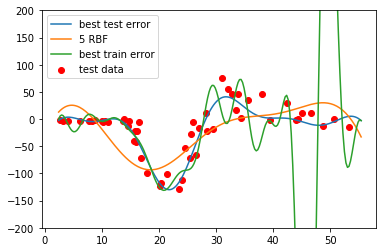

In [48]:
motorReg.radialLinReg(lTest)
motorReg.fit()
testPredict = motorReg.predict(motorReg.xGrid)

motorReg.radialLinReg(lTrain)
motorReg.fit()
trainPredict = motorReg.predict(motorReg.xGrid)

plt.plot(motorReg.featGrid, testPredict, label='best test error')
plt.plot(motorReg.featGrid, y5g, label='5 RBF')
plt.plot(motorReg.featGrid, trainPredict, label='best train error')
plt.scatter(motorReg.featTest, motorReg.yTest, label='test data', color='red')
plt.legend()
plt.ylim(-200, 200)
plt.show()

<b>2.a)</b> We now consider a Bayesian setting in which the coefficients $w$ are assigned a centered Gaussian prior with covariance $\alpha^{-1} \mathbb{1}$.  In this case the MAP estimate for $w$ is 
$$
w = ( \Phi^T \Phi +  \alpha \beta^{-1} \mathbb{1} )^{-1} \Phi^T y,
$$
where $\Phi$ is the data matrix and $\beta$ is the parameter in the assumption $y \vert_{x, w} \sim \mathrm{Normal} (w^T x), \beta^{-1} )$.  

With $L=50$ polynomial basis features, compute MAP estimates for $\beta = 0.0025$ and $ \alpha \in \{ 10^{-8}, 10^{-7}, \dots , 10^0 \}$.  Plot the training and test MSE as a function of $\log ( \delta)$.  Plot the predictions of the models which minimize test and training error.

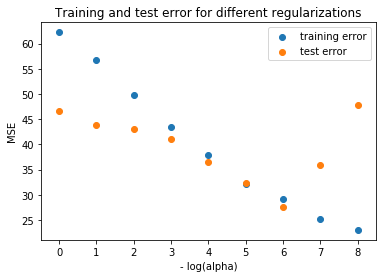

In [49]:
logAlpha = np.arange(-8, 1)
dTrainP, dTestP, *_ = motorReg.bayesValidate(50, logAlpha, 0.0025, basis='poly', plot=True)

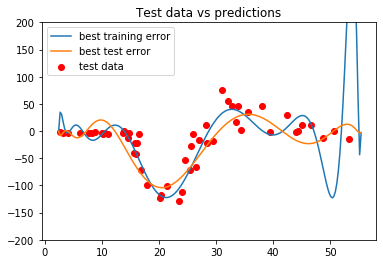

In [50]:
motorReg.fitReg(dTrainP)
trainP = motorReg.predict(motorReg.xGrid)
motorReg.fitReg(dTestP)
testP = motorReg.predict(motorReg.xGrid)

plt.plot(motorReg.featGrid, trainP, label='best training error')
plt.plot(motorReg.featGrid, testP, label='best test error')
plt.scatter(motorReg.featTest, motorReg.yTest, label='test data', color='red')
plt.title('Test data vs predictions')
plt.legend()
plt.ylim(-200, 200)
plt.show()

<b>2c)</b> Repeat the previous problem with $L=50$ radial basis functions.

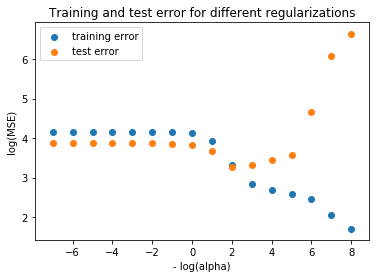

In [51]:
logAlpha = np.arange(-8, 8)
dTrainR, dTestR, *_ = motorReg.bayesValidate(50, logAlpha, 0.0025, basis='radial', plot=True)

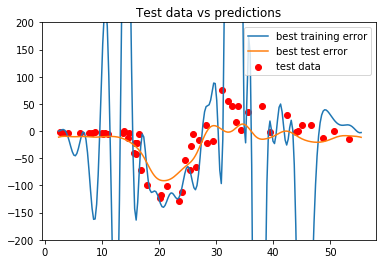

In [52]:
motorReg.fitReg(dTrainR)
trainP = motorReg.predict(motorReg.xGrid)
motorReg.fitReg(dTestR)
testP = motorReg.predict(motorReg.xGrid)

plt.plot(motorReg.featGrid, trainP, label='best training error')
plt.plot(motorReg.featGrid, testP, label='best test error')
plt.scatter(motorReg.featTest, motorReg.yTest, label='test data', color='red')
plt.title('Test data vs predictions')
plt.legend()
plt.ylim(-200, 200)
plt.show()

<b>2.d)</b> The posterior mean for $w$ is given in the problem statement for 2a above.  The posterior covariance is,
$$
S = ( \beta \Phi^T \Phi + \alpha \mathbb{1} )^{-1}
$$
Draw 10 samples for $w$ and plot the resulting prediction functions $f(x) = w^T \Phi (x)$, for each of the models minimizing the test error for the $50$ polynomial and radial basis function examples above.

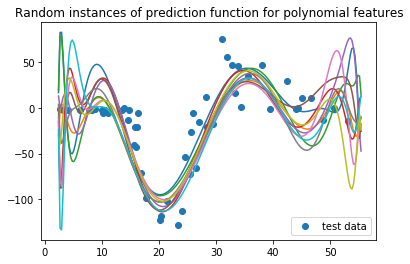

In [53]:
motorReg.polyLinReg(50)
motorReg.fitReg(dTestP)
w = motorReg.randomize(10, 0.0025)
for i in range(10):
    motorReg.w = np.reshape(w[i, :], (-1,1))
    plt.plot(motorReg.featGrid, motorReg.predict(motorReg.xGrid))
plt.scatter(motorReg.featTest, motorReg.yTest, label='test data')
plt.legend()
plt.title('Random instances of prediction function for polynomial features')
plt.show()

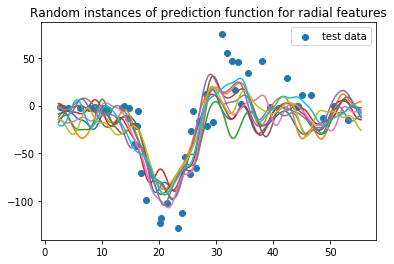

In [54]:
motorReg.radialLinReg(50)
motorReg.fitReg(dTestR)
w = motorReg.randomize(10, 0.0025)
for i in range(10):
    motorReg.w = np.reshape(w[i, :], (-1,1))
    plt.plot(motorReg.featGrid, motorReg.predict(motorReg.xGrid))
plt.scatter(motorReg.featTest, motorReg.yTest, label='test data')
plt.legend()
plt.title('Random instances of prediction function for radial features')
plt.show()